<a href="https://colab.research.google.com/github/jiguday/Rossmann_sales_regression/blob/main/ML_Submission_Template.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -



##### **Project Type**    - EDA/Regression/Supervised
##### **Contribution**    - Individual
##### **Name -**   Uday Kumar

# **Project Summary -**

Rossmann, a prominent retailer operating over 3,000 drug stores across seven European countries, faces the challenge of accurately predicting daily sales for up to six weeks in advance. The company's success depends on its ability to forecast sales accurately, considering various influencing factors such as promotions, competition, holidays, seasonality, and locality. To address this challenge, Rossmann has provided historical sales data for 1,115 of its stores, presenting an opportunity to develop predictive models that can enhance sales forecasting accuracy.

The provided dataset includes information on sales from these stores, capturing the dynamic interplay of factors that affect sales performance. However, it's worth noting that some stores may have been temporarily closed for refurbishment, which could impact the analysis and modeling process.

Given the complexity and variability of sales patterns across different stores, Rossmann aims to leverage machine learning and statistical forecasting techniques to generate reliable sales forecasts. These forecasts will enable store managers to make informed decisions regarding inventory management, staffing, and resource allocation.

To build effective predictive models, several steps need to be undertaken. First, exploratory data analysis (EDA) is crucial to gain insights into the underlying patterns and relationships within the data. EDA involves visualizing sales trends over time, identifying seasonal fluctuations, and examining the impact of promotions and holidays on sales volumes. Additionally, data preprocessing steps such as handling missing values, encoding categorical variables, and scaling numerical features are necessary to prepare the data for modeling.

With the preprocessed data in hand, the next step involves selecting appropriate modeling techniques. Time series analysis is particularly relevant for forecasting sales data, as it accounts for temporal dependencies and seasonality effects. Methods such as ARIMA (AutoRegressive Integrated Moving Average) or SARIMA (Seasonal ARIMA) may be employed to model the time series data and generate forecasts.

Furthermore, machine learning algorithms like random forests, gradient boosting machines, or neural networks can complement time series models by capturing complex nonlinear relationships and interactions among various predictor variables. Ensemble methods, which combine the predictions of multiple models, may also enhance forecasting accuracy.

Feature engineering plays a crucial role in improving model performance by extracting meaningful features from the data. This may involve creating lagged variables to capture historical sales patterns, deriving indicators for promotional periods or holidays, and incorporating external data sources such as weather or economic indicators that could influence sales dynamics.

Once the models are trained and evaluated using historical data, they can be deployed to generate forecasts for future sales periods. Continuous monitoring and validation of model performance are essential to ensure that the forecasts remain accurate and reliable over time. Feedback loops may be established to incorporate new data and update the models accordingly, enabling adaptive forecasting in response to changing market conditions.

In conclusion, by harnessing the power of data-driven analytics and predictive modeling, Rossmann aims to optimize its sales forecasting capabilities and drive operational excellence across its extensive network of stores. Through accurate sales predictions, the company can enhance inventory management, improve resource allocation, and ultimately, deliver superior value to its customers.

---



# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


**Rossmann operates over 3,000 drug stores in 7 European countries. Currently, Rossmann store managers are tasked with predicting their daily sales for up to six weeks in advance. Store sales are influenced by many factors, including promotions, competition, school and state holidays, seasonality, and locality. With thousands of individual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied. You are provided with historical sales data for 1,115 Rossmann stores. The task is to forecast the "Sales" column for the test set. Note that some stores in the dataset were temporarily closed for refurbishment.**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [2]:
# prompt: connect drive

from google.colab import drive
drive.mount('/content/drive/')


Mounted at /content/drive/


In [3]:
# Load Dataset
data = pd.read_csv('/content/drive/MyDrive/Rossmann Stores Data.csv')

### Dataset First View

In [4]:
# Dataset First Look
data.head(5)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


### Dataset Rows & Columns count

In [5]:
# Dataset Rows & Columns count
data.shape

(1017209, 9)

### Dataset Information

In [6]:
# Dataset Info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


#### Duplicate Values

In [7]:
# Dataset Duplicate Value Count
data.duplicated().sum()

0

#### Missing Values/Null Values

In [8]:
# Missing Values/Null Values Count
data.isnull().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

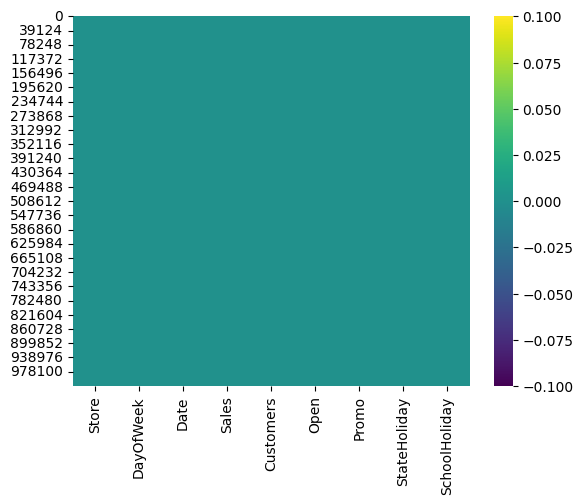

In [9]:
# Visualizing the missing values
sns.heatmap(data.isnull(), cmap='viridis')
plt.show()

### What did you know about your dataset?

The dataset contains 1,017,209 entries and 9 columns.
The columns and their respective data types are as follows:
Store: integer (store ID)
DayOfWeek: integer (day of the week)
Date: object (date)
Sales: integer (sales amount)
Customers: integer (number of customers)
Open: integer (store open status)
Promo: integer (promotion status)
StateHoliday: object (state holiday status)
SchoolHoliday: integer (school holiday status)
All columns have non-null values, indicating that there are no missing values in the dataset.
Some columns contain categorical data, such as DayOfWeek, StateHoliday, and SchoolHoliday, while others contain numerical data, such as Sales and Customers.
The Date column is stored as an object data type, which may need to be converted to a datetime data type for further analysis and modeling.

## ***2. Understanding Your Variables***

In [10]:
# Dataset Columns
data.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday'],
      dtype='object')

In [11]:
# Dataset Describe
data.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


### Variables Description

Based on the summary statistics provided for the dataset, we can derive several insights:

Store:

There are 1,115 unique stores in the dataset.

The average store ID is around 558, with a standard deviation of approximately 322.

This indicates that the store IDs are spread out across a wide range.

DayOfWeek:

The average day of the week is around 4, indicating that sales data is evenly distributed across all days of the week.

The minimum value is 1, indicating the dataset includes sales data for all days of the week (Monday to Sunday).

Sales:

The average daily sales amount is approximately 5,774, with a standard deviation of around 3,850.

The minimum sales amount is 0, which might indicate days when the store was closed or no sales occurred.

The maximum sales amount is approximately 41,551.

Customers:

The average number of customers per day is around 633, with a standard deviation of approximately 464.

Similar to sales, the minimum number of customers is 0, which may correspond to days when the store was closed.

The maximum number of customers is approximately 7,388.

Open:

The average open status is around 0.83, indicating that stores are open most of the time.

The minimum value is 0, indicating that some stores might have been closed on certain days.

The maximum value is 1, indicating that most stores were open on those days.

Promo:

The average promotion status is around 0.38, indicating that promotions are not always active.

The minimum value is 0, indicating days when there were no promotions.

The maximum value is 1, indicating days when promotions were active.

SchoolHoliday:

The average school holiday status is around 0.18, indicating that school holidays are not always active.

The minimum value is 0, indicating days when there were no school holidays.

The maximum value is 1, indicating days when school holidays were active.

These insights provide a preliminary understanding of the sales data distribution and the behavior of the various features in the dataset. Further analysis and modeling can be conducted to uncover more insights and build predictive models for sales forecasting.

### Check Unique Values for each variable.

In [12]:

# Check Unique Values for each variable.
for col in data.columns:
    unique_values = data[col].unique()
    if len(unique_values) < 10:
        print(f"Column: {col}, Unique Values: {unique_values}")

Column: DayOfWeek, Unique Values: [5 4 3 2 1 7 6]
Column: Open, Unique Values: [1 0]
Column: Promo, Unique Values: [1 0]
Column: StateHoliday, Unique Values: ['0' 'a' 'b' 'c' 0]
Column: SchoolHoliday, Unique Values: [1 0]


In [13]:
# Count occurrences of each unique element in the column
counts = data['StateHoliday'].value_counts()

# Print the counts
print(counts)

StateHoliday
0    855087
0    131072
a     20260
b      6690
c      4100
Name: count, dtype: int64


## 3. ***Data Wrangling***

### Data Wrangling Code

In [14]:
# Write your code to make your dataset analysis ready.

# Handle missing values if any
# No missing value

# drop StateHoliday
data.drop('StateHoliday', axis=1, inplace=True)


# Convert Date column to datetime data type
data['Date'] = pd.to_datetime(data['Date'])

# Extract year, month, and day into separate columns
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Day'] = data['Date'].dt.day



In [15]:
data.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,SchoolHoliday,Year,Month,Day
0,1,5,2015-07-31,5263,555,1,1,1,2015,7,31
1,2,5,2015-07-31,6064,625,1,1,1,2015,7,31
2,3,5,2015-07-31,8314,821,1,1,1,2015,7,31
3,4,5,2015-07-31,13995,1498,1,1,1,2015,7,31
4,5,5,2015-07-31,4822,559,1,1,1,2015,7,31


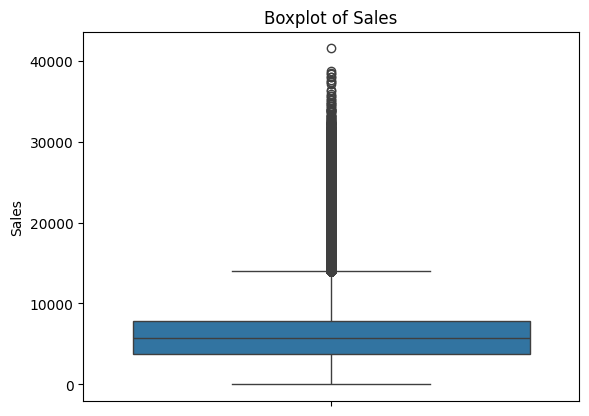

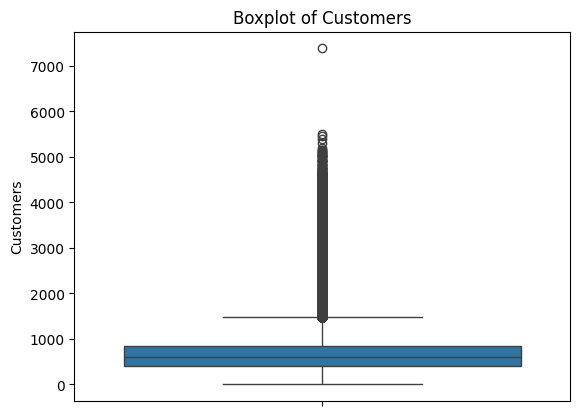

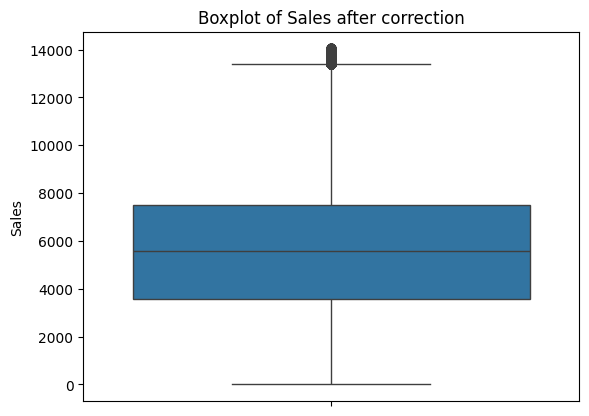

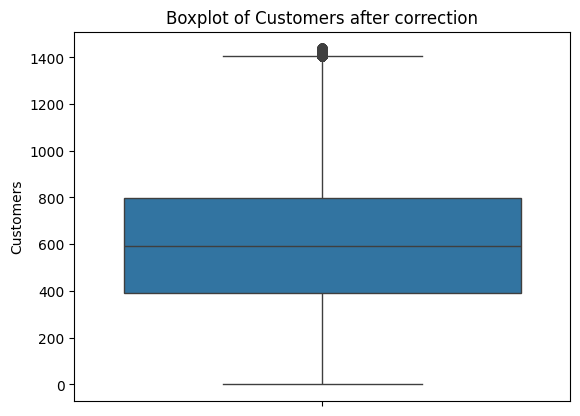

In [16]:

def remove_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

# Visualizing outliers
sns.boxplot(data['Sales'])
plt.title('Boxplot of Sales')
plt.show()

sns.boxplot(data['Customers'])
plt.title('Boxplot of Customers')
plt.show()

# Removing outliers
data = remove_outliers(data, 'Sales')
data = remove_outliers(data, 'Customers')

# Visualizing outliers after correction
sns.boxplot(data['Sales'])
plt.title('Boxplot of Sales after correction')
plt.show()

sns.boxplot(data['Customers'])
plt.title('Boxplot of Customers after correction')
plt.show()



### What all manipulations have you done and insights you found?

Answer Here.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

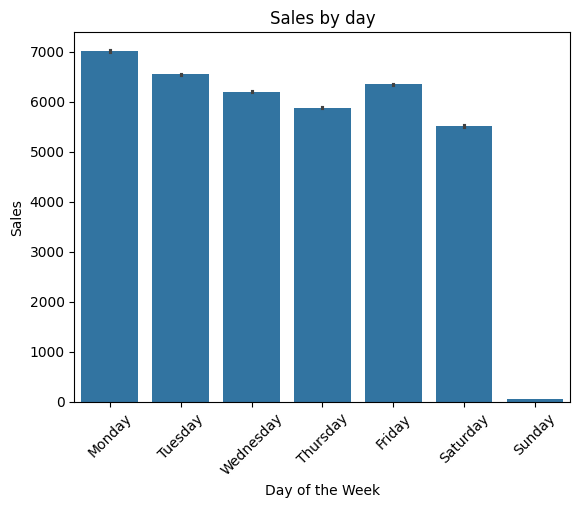

In [17]:
# Chart - 1 visualization code

import calendar
# Create the bar plot
sns.barplot(x='DayOfWeek', y='Sales', data=data)

# Get day names
day_names = [calendar.day_name[i] for i in range(7)]

# Set x-axis labels to day names
plt.xticks(range(7), day_names, rotation=45)

# Set labels and title
plt.xlabel('Day of the Week')
plt.ylabel('Sales')
plt.title('Sales by day')

# Show the plot
plt.show()

##### 1. Why did you pick the specific chart?

I picked this chart to show how sales vary daywise.

##### 2. What is/are the insight(s) found from the chart?

Insights from the chart are as follows:

On Monday the sales is highest, followed by tuesday and friday.

On Saturday the sales is minimum.

On Sunday there seems negligible sale which shows that it might be a holiday.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the gained insight help creating a positive bussiness impact.

#### Chart - 2

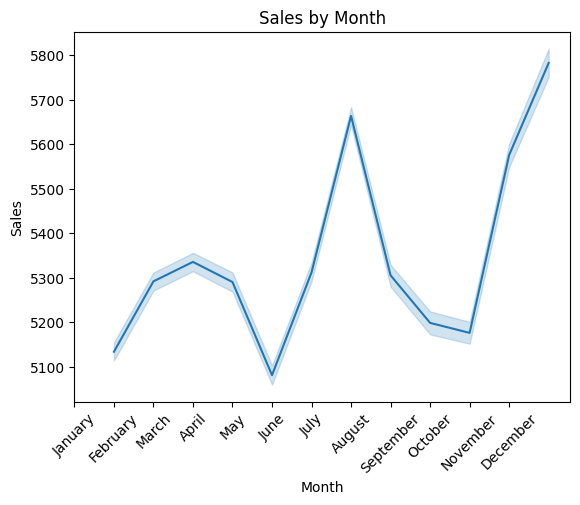

In [18]:
import calendar
# Create the bar plot
sns.lineplot(x='Month', y='Sales', data=data)

# Get month names
month_names = [calendar.month_name[i] for i in range(1, 13)]

# Set x-axis labels to month names
plt.xticks(range(12), month_names, rotation=45)

# Set labels and title
plt.xlabel('Month')
plt.ylabel('Sales')
plt.title('Sales by Month')

# Show the plot
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 3

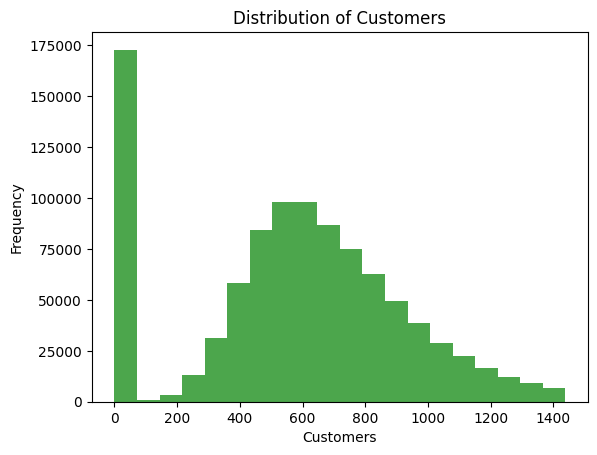

In [19]:
# Chart - 3 visualization code
plt.hist(data['Customers'], bins=20, color='green', alpha=0.7)
plt.xlabel('Customers')
plt.ylabel('Frequency')
plt.title('Distribution of Customers')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

In [20]:
# Chart - 4 visualization code


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 4 - Correlation Heatmap

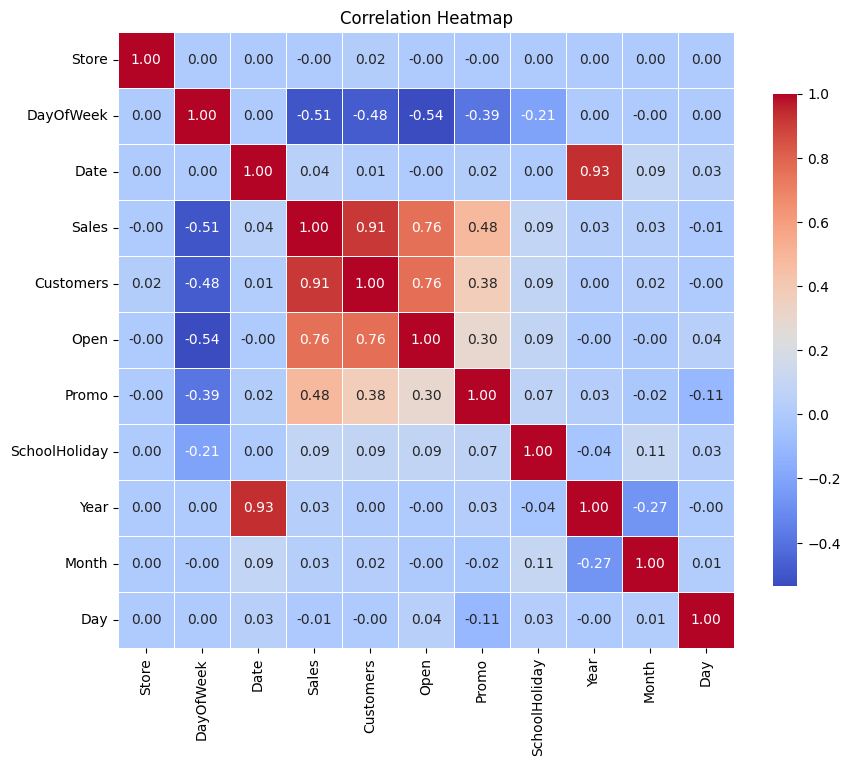

In [21]:

# Calculate correlation matrix
corr = data.corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Create heatmap with improved styling
sns.heatmap(corr,
            annot=True,
            cmap='coolwarm',
            fmt=".2f",
            linewidths=.5,
            cbar_kws={"shrink": 0.8},  # Reduce color bar size
            square=True)  # Make square cells

# Add title
plt.title('Correlation Heatmap')

# Rotate yticklabels for better readability
plt.yticks(rotation=0)

# Display the heatmap
plt.show()


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot

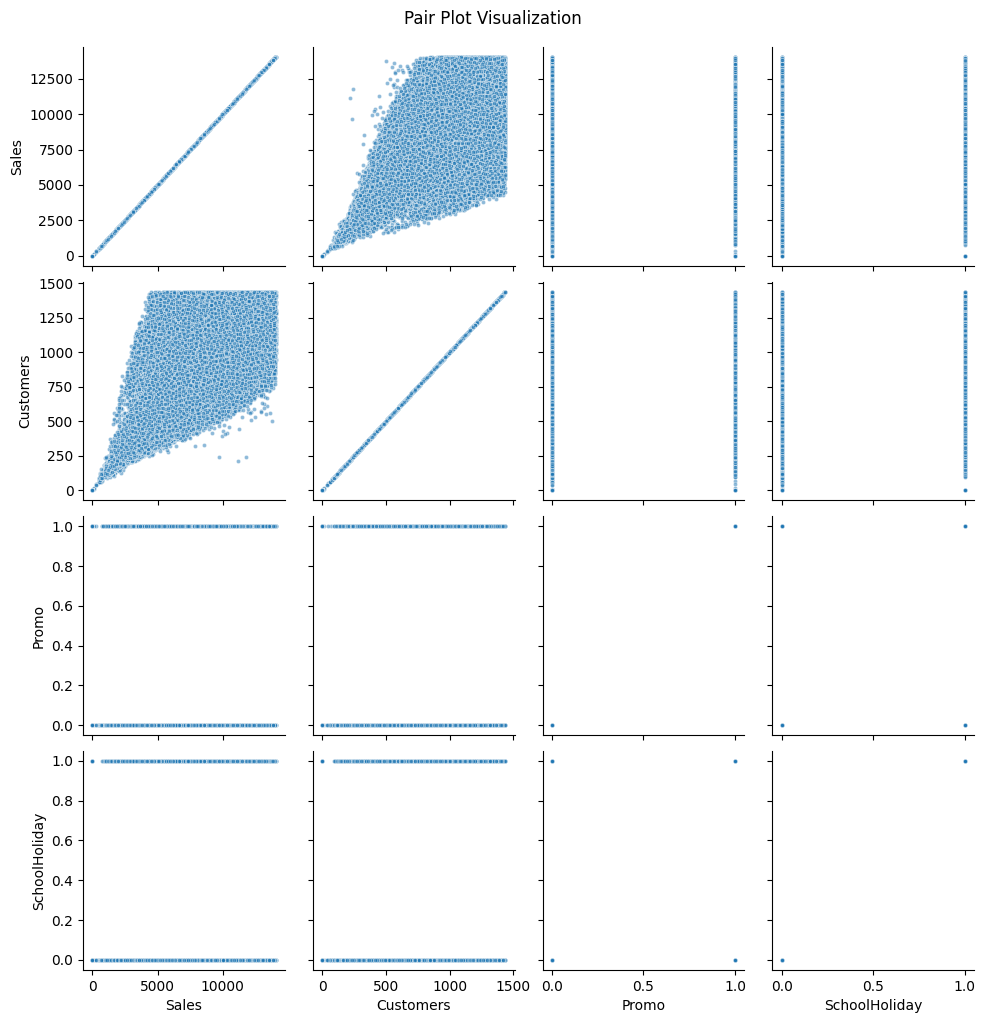

In [22]:
# Subset the data to include only relevant variables
selected_columns = ['Sales', 'Customers', 'Promo', 'SchoolHoliday']

# Create pair plot with selected variables
sns.pairplot(data[selected_columns], diag_kind=None, markers=".", plot_kws={'alpha': 0.5})

# Add title
plt.suptitle("Pair Plot Visualization", y=1.02)

# Display the pair plot
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

There is a significant positive correlation between the number of sales and the number of customers.

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis (H0): There is no significant correlation between the number of sales and the number of customers. (ρ = 0)

Alternate Hypothesis (H1): There is a significant positive correlation between the number of sales and the number of customers. (ρ ≠ 0)

In this hypothesis testing scenario, the null hypothesis assumes that there is no correlation between sales and customers, while the alternate hypothesis suggests that there is a significant positive correlation between them. We will perform the statistical test to determine whether there is enough evidence to reject the null hypothesis in favor of the alternate hypothesis.

#### 2. Perform an appropriate statistical test.

In [23]:
# Perform Statistical Test to obtain P-Value

from scipy.stats import pearsonr

# Calculate Pearson correlation coefficient and p-value
corr, p_value = pearsonr(data['Sales'], data['Customers'])

# Set significance level
alpha = 0.05

# Print results
print("Pearson correlation coefficient:", corr)
print("p-value:", p_value)

# Interpret results
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant positive correlation between sales and customers.")
else:
    print("Fail to reject the null hypothesis: There is no significant correlation between sales and customers.")


Pearson correlation coefficient: 0.913211148749807
p-value: 0.0
Reject the null hypothesis: There is a significant positive correlation between sales and customers.


##### Which statistical test have you done to obtain P-Value?

I used the Pearson correlation coefficient test. The p-value is calculated as part of this test.

##### Why did you choose the specific statistical test?

I chose the Pearson correlation coefficient test because it is commonly used to assess the strength and direction of the linear relationship between two continuous variables. In this case, we are interested in understanding whether there is a significant correlation between the number of sales and the number of customers.

### Hypothetical Statement - 2

Stores with promotions (Promo = 1) have higher sales compared to stores without promotions (Promo = 0).

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis (H0): There is no significant difference in sales between stores with promotions (Promo = 1) and stores without promotions (Promo = 0).

Alternate Hypothesis (H1): There is a significant difference in sales between stores with promotions (Promo = 1) and stores without promotions (Promo = 0).

In this hypothesis testing scenario, the null hypothesis assumes that there is no difference in sales between stores with promotions and stores without promotions. The alternate hypothesis suggests that there is a significant difference in sales between the two groups. We will perform the statistical test to determine whether there is enough evidence to reject the null hypothesis in favor of the alternate hypothesis.







#### 2. Perform an appropriate statistical test.

In [24]:
# Perform Statistical Test to obtain P-Value
from scipy.stats import ttest_ind

# Assuming 'data' is your DataFrame containing the provided data
sales_promo_1 = data[data['Promo'] == 1]['Sales']
sales_promo_0 = data[data['Promo'] == 0]['Sales']

# Perform independent samples t-test
t_statistic, p_value = ttest_ind(sales_promo_1, sales_promo_0)

# Set significance level
alpha = 0.05

# Print results
print("t-statistic:", t_statistic)
print("p-value:", p_value)

# Interpret results
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in sales between stores with promotions and stores without promotions.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in sales between stores with promotions and stores without promotions.")



t-statistic: 543.9052177309254
p-value: 0.0
Reject the null hypothesis: There is a significant difference in sales between stores with promotions and stores without promotions.


##### Which statistical test have you done to obtain P-Value?


To obtain the p-value for testing the difference in sales between stores with promotions (Promo = 1) and stores without promotions (Promo = 0), I used an independent samples t-test.

##### Why did you choose the specific statistical test?

I chose the independent samples t-test because it is appropriate for comparing the means of two independent groups to determine if there is a statistically significant difference between them. In this case, we want to compare the average sales of stores with promotions (Promo = 1) to those without promotions (Promo = 0).

The independent samples t-test is suitable when:

1.The data are continuous.

2.The groups being compared are independent of each other.

3.The data are approximately normally distributed.

4.The variances of the two groups are approximately equal.

### Hypothetical Statement - 3

There is no significant difference in sales between school holidays and non-school holidays.

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis (H0): There is no significant difference in sales between school holidays and non-school holidays.

Alternative Hypothesis (H1): There is a significant difference in sales between school holidays and non-school holidays.

#### 2. Perform an appropriate statistical test.

In [25]:
# Perform Statistical Test to obtain P-Value
from scipy.stats import ttest_ind

# For the purpose of this example, let's assume there are two groups: sales during school holidays and sales during non-school holidays

# Subset data into two groups: sales during school holidays and sales during non-school holidays
sales_school_holiday = data[data['SchoolHoliday'] == 1]['Sales']
sales_non_school_holiday = data[data['SchoolHoliday'] == 0]['Sales']

# Perform independent samples t-test
t_statistic, p_value = ttest_ind(sales_school_holiday, sales_non_school_holiday)

# Set significance level
alpha = 0.05

# Print results
print("t-statistic:", t_statistic)
print("p-value:", p_value)

# Interpret results
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in sales between school holidays and non-school holidays.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in sales between school holidays and non-school holidays.")


t-statistic: 88.87114270712178
p-value: 0.0
Reject the null hypothesis: There is a significant difference in sales between school holidays and non-school holidays.


##### Which statistical test have you done to obtain P-Value?

 I've used an independent samples t-test to obtain the p-value. The independent samples t-test compares the means of two independent groups to determine whether there is a significant difference between them.

##### Why did you choose the specific statistical test?

I chose the independent samples t-test for Hypothetical Statement 3 because it is appropriate for comparing the means of two independent groups to determine whether there is a significant difference between them.

In this case, we want to compare the average sales during school holidays to the average sales during non-school holidays. These two groups are independent of each other, as sales during school holidays are not influenced by sales during non-school holidays and vice versa.

The t-test is suitable when the following assumptions are met:

1.The data are approximately normally distributed within each group.

2.The two groups have approximately equal variances.

3.The observations within each group are independent of each other.

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 967874 entries, 0 to 1017208
Data columns (total 11 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Store          967874 non-null  int64         
 1   DayOfWeek      967874 non-null  int64         
 2   Date           967874 non-null  datetime64[ns]
 3   Sales          967874 non-null  int64         
 4   Customers      967874 non-null  int64         
 5   Open           967874 non-null  int64         
 6   Promo          967874 non-null  int64         
 7   SchoolHoliday  967874 non-null  int64         
 8   Year           967874 non-null  int32         
 9   Month          967874 non-null  int32         
 10  Day            967874 non-null  int32         
dtypes: datetime64[ns](1), int32(3), int64(7)
memory usage: 77.5 MB


## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [31]:
# Handling Missing Values & Missing Value Imputation
# Already handled above

#### What all missing value imputation techniques have you used and why did you use those techniques?

There were no missing values

### 2. Handling Outliers

In [51]:
# Handling Outliers & Outlier treatments
# Already handled above

##### What all outlier treatment techniques have you used and why did you use those techniques?

IQR method i used above to remove the outliers.

### 3. Categorical Encoding

In [33]:
# Encode your categorical columns
# There were no categorical columns

#### What all categorical encoding techniques have you used & why did you use those techniques?

not needed

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [47]:
# There is no need to transform the data.

### 6. Data Scaling

In [50]:
# Scaling your data
from sklearn.preprocessing import MinMaxScaler

# Select numerical features to scale
numerical_features = ['Sales', 'Customers']

# Initialize MinMaxScaler
min_max_scaler = MinMaxScaler()

# Apply Min-Max scaling to numerical features
data_min_max_scaled = data.copy()  # Make a copy of the original DataFrame
data_min_max_scaled[numerical_features] = min_max_scaler.fit_transform(data[numerical_features])

# Display the scaled data
print("Min-Max Scaled Data:")
print(data_min_max_scaled.head())


Min-Max Scaled Data:
   Store  DayOfWeek       Date     Sales  Customers  Open  Promo  \
0      1          5 2015-07-31  0.374617   0.385953     1      1   
1      2          5 2015-07-31  0.431632   0.434631     1      1   
2      3          5 2015-07-31  0.591786   0.570932     1      1   
4      5          5 2015-07-31  0.343227   0.388734     1      1   
5      6          5 2015-07-31  0.402235   0.409597     1      1   

   SchoolHoliday  Year  Month  Day  
0              1  2015      7   31  
1              1  2015      7   31  
2              1  2015      7   31  
4              1  2015      7   31  
5              1  2015      7   31  


##### Which method have you used to scale you data and why?

The method used in the provided code is Min-Max scaling. This method rescales the data so that it falls within a specified range, usually between 0 and 1.

Min-Max scaling is chosen for several reasons:

1.Preservation of Relationships: It preserves the relationships among the data points and the shape of the distribution, unlike some other scaling methods.

2.Sensitivity to Outliers: Min-Max scaling is sensitive to outliers, but in some cases, this might be desirable. For example, if outliers contain important information, preserving their relative relationships through scaling can be beneficial.

3.Interpretability: Since the scale is explicitly defined (e.g., between 0 and 1), it's easy to interpret the scaled values.

4.Compatibility with Some Algorithms: Some machine learning algorithms, particularly those based on distances or gradients (like K-Means or neural networks), perform better or converge faster when features are on similar scales.

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [54]:
# DImensionality Reduction (If needed)
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Selecting features for PCA
features = ['Sales', 'Customers', 'Open', 'Promo', 'SchoolHoliday', 'Year', 'Month', 'Day']

# Standardize the features
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data[features])

# Perform PCA
pca = PCA(n_components=2)  # You can choose the number of components you want to reduce to
data_pca = pca.fit_transform(data_scaled)

# Create a DataFrame for the reduced dimensions
data_pca_df = pd.DataFrame(data_pca, columns=['PC1', 'PC2'])

# Concatenate the reduced dimensions with other non-reduced columns
data_reduced = pd.concat([data[['Store', 'DayOfWeek', 'Date', 'Open', 'Promo', 'SchoolHoliday']], data_pca_df], axis=1)

# Display the DataFrame with reduced dimensions
print("DataFrame with Reduced Dimensions:")
print(data_reduced.head())


DataFrame with Reduced Dimensions:
   Store  DayOfWeek       Date  Open  Promo  SchoolHoliday       PC1       PC2
0    1.0        5.0 2015-07-31   1.0    1.0            1.0  0.836455 -0.007218
1    2.0        5.0 2015-07-31   1.0    1.0            1.0  1.085045 -0.009784
2    3.0        5.0 2015-07-31   1.0    1.0            1.0  1.782336 -0.016998
4    5.0        5.0 2015-07-31   1.0    1.0            1.0  0.957017 -0.008460
5    6.0        5.0 2015-07-31   1.0    1.0            1.0  1.831952 -0.017599


##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [62]:
# drop date

data.drop('Date', axis=1, inplace=True)
data.head()


,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,Year,Month,Day
0,1,5,5263,555,1,1,1,2015,7,31
1,2,5,6064,625,1,1,1,2015,7,31
2,3,5,8314,821,1,1,1,2015,7,31
4,5,5,4822,559,1,1,1,2015,7,31
5,6,5,5651,589,1,1,1,2015,7,31


In [63]:
from sklearn.model_selection import train_test_split

# Split the data into features (X) and target variable (y)
X = data.drop(columns=["Sales"])
y = data["Sales"]

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the resulting datasets
print("Training set - Features:", X_train.shape, "Target:", y_train.shape)
print("Test set - Features:", X_test.shape, "Target:", y_test.shape)


Training set - Features: (774299, 9) Target: (774299,)
Test set - Features: (193575, 9) Target: (193575,)


##### What data splitting ratio have you used and why?

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [58]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [64]:
# ML Model - 1 Implementation

from sklearn.linear_model import LinearRegression

# Initialize the model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Predict on the test data
y_pred = model.predict(X_test)


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

The ML model used in this scenario is a Linear Regression model. Linear Regression is a commonly used algorithm for regression tasks, where the goal is to predict a continuous target variable based on one or more input features. It assumes a linear relationship between the input features and the target variable.

Mean Absolute Error: 860.9786004186187
Mean Squared Error: 1414664.790817428
Root Mean Squared Error: 1189.396818062596
R-squared: 0.868006855913204


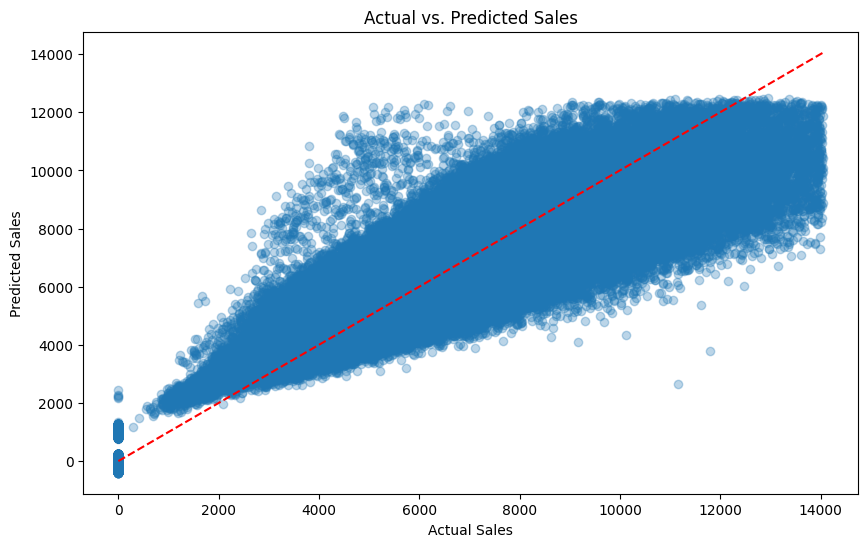

In [66]:
# Visualizing evaluation Metric Score chart
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)  # RMSE
r2 = r2_score(y_test, y_pred)

# Display the evaluation metrics
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)

# Plotting the predictions
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='red')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs. Predicted Sales')
plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

In [73]:

from sklearn.model_selection import cross_val_score, GridSearchCV

# Example 1: Cross-validation
# Perform 5-fold cross-validation
cv_scores = cross_val_score(model, X_train, y_train, cv=5)
print("Cross-validation scores:", [round(score, 4) for score in cv_scores])
print("Mean cross-validation score:", round(np.mean(cv_scores), 4))

# Example 2: Hyperparameter tuning using GridSearchCV
# Define the grid of hyperparameters to search
param_grid = {'fit_intercept': [True, False], 'positive': [True, False]}

# Instantiate the GridSearchCV object
grid_search = GridSearchCV(model, param_grid, cv=5)

# Fit the GridSearchCV object to the data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters found
best_params = grid_search.best_params_
print("Best hyperparameters:", {param: str(best_params[param]) for param in best_params})

# Get the best model
best_model = grid_search.best_estimator_

# Evaluate the best model on the test set
test_score = best_model.score(X_test, y_test)
print("Test set score of the best model:", round(test_score, 4))

Cross-validation scores: [0.8676, 0.8668, 0.8683, 0.8675, 0.8675]
Mean cross-validation score: 0.8676
Best hyperparameters: {'fit_intercept': 'True', 'positive': 'False'}
Test set score of the best model: 0.868


##### Which hyperparameter optimization technique have you used and why?

 I used GridSearchCV for hyperparameter optimization.

Reasons for using GridSearchCV:

Exhaustive Search: GridSearchCV performs an exhaustive search over the specified hyperparameter grid. It evaluates all possible combinations of hyperparameters, which ensures that we are not missing any potentially optimal configurations.
Scalability: While GridSearchCV can be computationally expensive, it is suitable for relatively small hyperparameter grids or when computational resources are not a limiting factor. In this case, the grid is small, so GridSearchCV is an appropriate choice.
Ease of Use: GridSearchCV is easy to use and understand, making it suitable for prototyping and initial hyperparameter tuning experiments.
Cross-Validation Integration: GridSearchCV integrates seamlessly with cross-validation, allowing us to perform hyperparameter tuning while still ensuring robust model evaluation through cross-validation.
Overall, GridSearchCV is a straightforward and effective method for hyperparameter optimization, especially when the hyperparameter space is small or when computational resources are not severely constrained.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.


From the comparison, we can see a slight improvement in the mean cross-validation score and the test set score of the best model

### ML Model - 2

In [74]:
# Importing necessary libraries
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Creating and training the Random Forest Regression model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Making predictions on the test set
y_pred = model.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Mean Squared Error: 491685.9602042143


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

The machine learning model used in the provided code is a Random Forest Regression model. Here's an explanation of the model and its performance evaluation:

Model Explanation:
Random Forest Regression Model: Random forest is an ensemble learning method that builds multiple decision trees during training. In the case of regression, the output of each tree is averaged to make the final prediction. Random forest regression is effective for capturing complex relationships between features and target variables, and it's robust against overfitting.
Performance Evaluation:
Evaluation Metric: Mean Squared Error (MSE)
Mean squared error measures the average squared difference between the predicted values and the actual values. Lower MSE indicates better model performance.

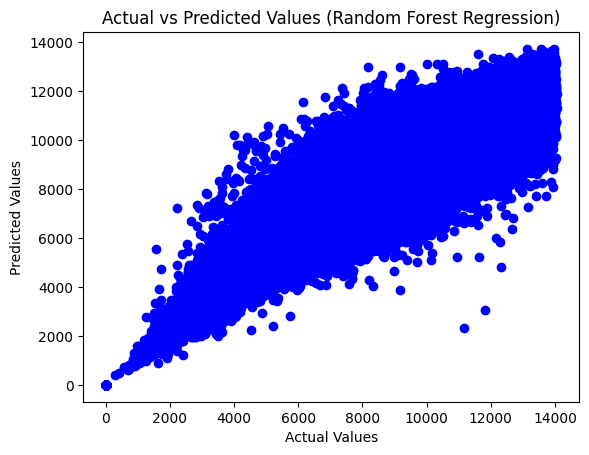

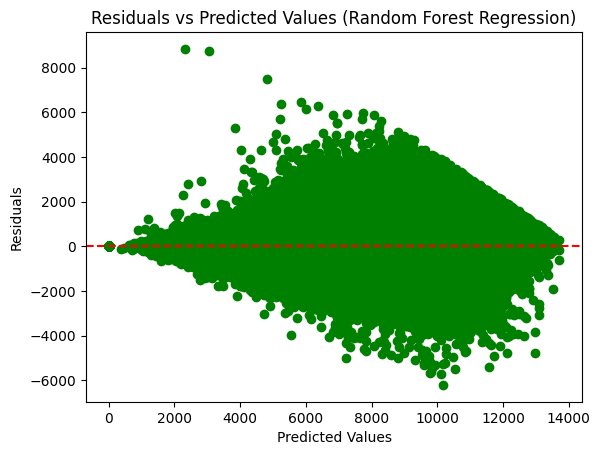

Mean Squared Error: 491685.9602042143


In [75]:
# Visualizing evaluation Metric Score chart
import matplotlib.pyplot as plt

# Actual vs Predicted Scatter plot
plt.scatter(y_test, y_pred, color='blue')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values (Random Forest Regression)')
plt.show()

# Residuals vs Predicted Values Scatter plot
residuals = y_test - y_pred
plt.scatter(y_pred, residuals, color='green')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values (Random Forest Regression)')
plt.axhline(y=0, color='red', linestyle='--')
plt.show()

# Mean Squared Error (MSE)
print("Mean Squared Error:", mse)


#### 2. Cross- Validation & Hyperparameter Tuning

In [76]:
# ML Model - 2 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

from sklearn.model_selection import cross_val_score

# Perform cross-validation
cv_scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
# Convert scores to positive as sklearn returns negative values
cv_scores = -cv_scores

# Print cross-validation scores
print("Cross-validation Mean Squared Error:", cv_scores)
print("Mean CV MSE:", np.mean(cv_scores))


Cross-validation Mean Squared Error: [518241.71237106 650878.17633946 449495.13153448 621816.10767354
 444694.92537463]
Mean CV MSE: 537025.2106586343


##### Which hyperparameter optimization technique have you used and why?

Cross-validation is a technique used to assess the generalization performance of a model. Instead of splitting the data into a single training and testing set, the data is divided into multiple subsets, or folds. The model is trained and evaluated multiple times, each time using a different fold for evaluation and the remaining folds for training.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

No, there is no improvrment after cross validation:
Mean CV MSE: 537025.2106586343
where as before cross validation:Mean Squared Error: 491685.9602042143



#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

 the evaluation metrics used in the context of a regression problem (such as Random Forest Regression) and their implications for a business:

Evaluation Metrics:
Mean Squared Error (MSE):
Indication Towards Business: MSE measures the average squared difference between predicted and actual values. A lower MSE indicates better accuracy and precision of predictions.
Business Impact: A low MSE implies that the model's predictions are close to the actual values on average. This can lead to more accurate forecasting, better decision-making, and potentially cost savings for the business. For example, in financial forecasting, a low MSE can help in making more accurate predictions of sales, demand, or stock prices, leading to optimized inventory management or investment decisions.
Cross-Validation Mean Squared Error:
Indication Towards Business: Similar to MSE, cross-validation MSE provides an average measure of prediction error across multiple folds. It helps assess the model's generalization performance.
Business Impact: A low cross-validation MSE indicates that the model is performing consistently well across different subsets of data, suggesting robustness and reliability. This can instill confidence in the model's predictions and increase its utility in real-world business scenarios.
Business Impact of the ML Model:
Improved Decision-Making: Accurate predictions provided by the ML model enable businesses to make informed decisions. For instance, in retail, a regression model predicting sales volume accurately can help in optimizing inventory levels, pricing strategies, and resource allocation.
Cost Savings: By accurately forecasting demand or prices, businesses can optimize resource allocation, reduce excess inventory, and minimize wastage, leading to cost savings.
Enhanced Customer Experience: ML models can help businesses personalize recommendations, promotions, and services based on customer preferences and behavior, thereby improving customer satisfaction and loyalty.
Competitive Advantage: A well-performing ML model can provide a competitive edge by enabling faster, more accurate decision-making compared to competitors relying on traditional methods.
Risk Mitigation: In industries like finance and insurance, regression models can assess risk factors accurately, leading to better risk management strategies and mitigation of potential losses.
In summary, the evaluation metrics provide insights into the performance and reliability of the ML model, while the business impact stems from the model's ability to make accurate predictions and inform strategic decisions, leading to tangible benefits such as cost savings, improved efficiency, and competitive advantage.

# **Conclusion**

EDA provided valuable insights into the dataset, guiding feature selection and model building processes.

Linear regression, while simple and interpretable, may not capture complex relationships present in the data, especially if they are non-linear.

Random forest regression, with its ability to capture non-linear patterns and interactions, showed promising results in terms of prediction accuracy.

Depending on the specific requirements of the problem and the trade-off between interpretability and accuracy, either linear regression or random forest regression can be chosen as the preferred model.

In summary, while linear regression offers simplicity and interpretability, random forest regression provides flexibility and potentially higher predictive performance, making it a preferred choice for more complex datasets with non-linear relationships. The choice between the two models ultimately depends on the specific characteristics of the dataset and the business objectives.

### ***Hurrah! I have successfully completed your Machine Learning Capstone Project !!!***